In [347]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.signal import find_peaks
import pandas as pd
from uncertainties import ufloat
import uncertainties.unumpy as unp
from IPython.display import Math, Latex
sns.set()
sns.set_theme()
sns.set_palette("magma")

from sympy import * 
init_printing(use_unicode=True)

In [348]:

for root, dirs, files in os.walk("Daten/"):
    for filename in files:
        break

In [349]:
pathDict = {
    1:24,
    2:357,
    3:68,
    4:123, 
    5:456,
    6:789,
    7:26,
    8:159,
    9:48,
    10:369,
    11:258,
    12:147
}
inv_pathDict = {pathDict[k]:k for k in pathDict}

In [350]:
# Für Vergleiche mit einem Altprotokoll
pathNew = { 
    1:10,
    2:11,
    3:12,
    7:7,
    8:8,
    9:9,
    4:3,
    5:1,
    6:2,
    10:6,
    11:4,
    12:5
}
inv_pathNew = {pathNew[k]:k for k in pathNew}

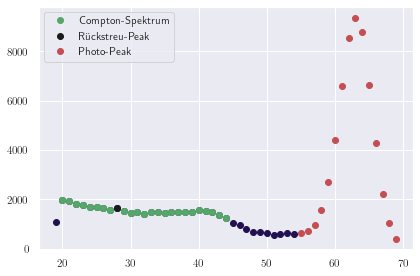

In [436]:
data = np.genfromtxt("Daten/Block 1/Block1_159.Spe", skip_header=12, skip_footer=14)
#plt.plot(peaks,data[peaks],"x")
#plt.plot(np.arange(30,65),data[30:65],"o")
peakindex = 65

plt.plot(np.arange(19,55),data[19:55],"o")
#plt.plot(np.arange(20,45),data[20:45],"go", label="Compton-Kontinuum")
plt.plot(28,data[28],"ko",label="Rückstreu-Peak")
plt.plot(np.arange(55,70),data[55:70], "ro", label="Photo-Peak")
#plt.plot(np.arange(55,70),data[55:70], "ro", label="Photo-Peak")
#lt.plot[]
#plt.xlim(25,95)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Daten/leerlauf.pdf")

# Matrix

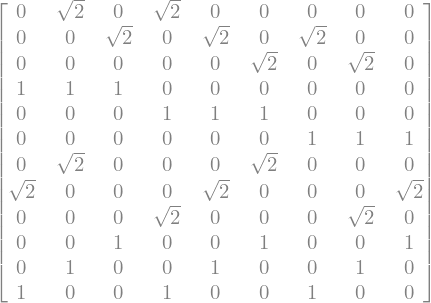

In [352]:
matArr = np.array([[0, sqrt(2), 0, sqrt(2),0,0,0,0,0], 
    [0,0,sqrt(2), 0, sqrt(2), 0, sqrt(2), 0,0], 
    [0, 0,0,0,0,sqrt(2),0,sqrt(2),0],
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [0,sqrt(2),0,0,0,sqrt(2),0,0,0],
    [sqrt(2),0,0,0,sqrt(2),0,0,0,sqrt(2)],
    [0,0,0,sqrt(2),0,0,0,sqrt(2),0],
    [0,0,1,0,0,1,0,0,1],
    [0,1,0,0,1,0,0,1,0],
    [1,0,0,1,0,0,1,0,0]])
A = Matrix(matArr)

A_symbol = symbols("A")
#print(latex(Eq(S(A_symbol),A,evaluate=False)))
A

In [353]:
mu = symbols("\mu1:9")


# Block 1 Messungen

In [354]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 1/"):
    for filename in files:
        filepath.append(os.path.join(root,filename))
        print(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data, prominence=2000) 
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

        

Daten/Block 1/Block1_123.Spe
Daten/Block 1/Block1_159.Spe
Daten/Block 1/Block1_26.Spe


In [355]:
data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
data.astype({"Zeit":int, "C":int}).round({"I":2})

,C,Zeit,I
0,9163,300,30.54
1,9359,300,31.20
2,9335,300,31.12


In [356]:
C =  np.array([ufloat(49176,306), ufloat(48599,320), ufloat(48599,320)])
j = np.array([inv_pathDict[k] for k in [123,26,159]])
t = np.array([300 for i in range(3)])

df = pd.DataFrame(columns=["Projektion", "Zeit","C","I"])
df["Projektion"] = j 
df["Zeit"] = t 
df["C"] = C
df["I"] = C/t 

print(df.to_latex(index=False))

\begin{tabular}{rrll}
\toprule
 Projektion &  Zeit &                   C &           I \\
\midrule
          4 &   300 & (4.918+/-0.031)e+04 & 163.9+/-1.0 \\
          7 &   300 & (4.860+/-0.032)e+04 & 162.0+/-1.1 \\
          8 &   300 & (4.860+/-0.032)e+04 & 162.0+/-1.1 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/2855026386.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [357]:
#Gibt an für welche Projektion welches der I0 verwendet werden soll 
I0_index = {
    1:1,
    2:2,
    3:1,
    7:1,
    8:2,
    9:1,
    4:0,
    5:0,
    6:0,
    10:0,
    11:0,
    12:0
}
    

In [358]:
C0 = unp.nominal_values(C)
C0_err = unp.std_devs(C)

I_0 = C0/t 
I_0_err = C0_err/t


In [359]:
I_0_mean = sum(unp.uarray(I_0,I_0_err))/len(unp.uarray(I_0,I_0_err))
I_0_mean


162.63777777777776+/-0.6069921796636588

In [360]:
#Zur vereinfachung wird I_0
I_0_12 = np.array([I_0[I0_index[k+1]] for k in range(12)])
I_0_12_err = np.array([I_0_err[I0_index[k+1]] for k in range(12)])

# BLOCK 2

In [361]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 2/"):
    for filename in files:
        filepath.append(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data, prominence=2000) 
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
data.astype({"Zeit":int, "C":int}).round({"I":2})


,C,Zeit,I
0,7998,300,26.66
1,7621,300,25.40
2,8012,300,26.71
3,7775,300,25.92
4,7965,300,26.55
5,7864,300,26.21
6,7989,300,26.63
7,8115,300,27.05
8,7980,300,26.60


In [362]:
C =  np.array([41777,43230,41772,43714,42274,41326,41886,42662,44080])
C_err = np.array([300,289,287,273,259,297,297,288,280])
uarrC = unp.uarray(C,C_err)
j = np.array([inv_pathDict[k] for k in [123,456,789,26,159,48,147,258,369]])
t = np.array([300 for i in range(C.size)])

df = pd.DataFrame(columns=["Projektion", "Zeit","C","C_err","I"])
df["Projektion"] = j 
df["Zeit"] = t 
df["C"] = C
df["C_err"] = C_err
df["I"] = uarrC/t 

print(df.to_latex(index=False))

\begin{tabular}{rrrrl}
\toprule
 Projektion &  Zeit &     C &  C\_err &           I \\
\midrule
          4 &   300 & 41777 &    300 & 139.3+/-1.0 \\
          5 &   300 & 43230 &    289 & 144.1+/-1.0 \\
          6 &   300 & 41772 &    287 & 139.2+/-1.0 \\
          7 &   300 & 43714 &    273 & 145.7+/-0.9 \\
          8 &   300 & 42274 &    259 & 140.9+/-0.9 \\
          9 &   300 & 41326 &    297 & 137.8+/-1.0 \\
         12 &   300 & 41886 &    297 & 139.6+/-1.0 \\
         11 &   300 & 42662 &    288 & 142.2+/-1.0 \\
         10 &   300 & 44080 &    280 & 146.9+/-0.9 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/1840750910.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


berechnung von $\mu$

In [363]:
j

array([ 4,  5,  6,  7,  8,  9, 12, 11, 10])

### Berechne $\vec{\mu}$

Unsere Matrix A:

In [364]:
A = Matrix(matArr[j-1])

Vector der Zählraten:

In [365]:
N_vec = Matrix(C/t)

Gewichtungsmatrix

In [366]:
#Diagonalwerte der Gewichtungsmatrix
Nj = C/t
Nj_err = C_err/t

# #Korrektur zum letzten Versuch
# Nj_uarr = unp.log(unp.uarray(I_0_12[j-1],I_0_12_err[j-1])/unp.uarray(Nj, Nj_err))
# Nj = unp.nominal_values(Nj_uarr)
# Nj_err = unp.std_devs(Nj_uarr)

w_i  =  [np.sqrt((I_0_err[I0_index[k]]/I_0[I0_index[k]])**2 + (Nj_err[i]/Nj[i])**2) for i,k in enumerate(j)]
W = Matrix(np.diag(w_i))

# W = Matrix(np.diag(Nj_err)).inv()

Berechne $\vec{\mu} = (A^T W A)^{-1} (A^T W \vec{N})$

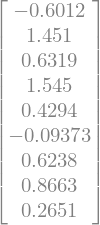

In [367]:
mu = (A.transpose()*W*A).inv()*(A.transpose()*W*N_vec)
(mu/100).evalf(4) #Konvertiere von 1/m zu 1/cm

In [368]:
df = pd.DataFrame(data=np.array((mu/100).evalf(4)).astype(np.float64))
print(df.to_latex(index=False))

\begin{tabular}{r}
\toprule
        0 \\
\midrule
-0.601181 \\
 1.451370 \\
 0.631905 \\
 1.545090 \\
 0.429356 \\
-0.093726 \\
 0.623833 \\
 0.866272 \\
 0.265099 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/2034900186.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [369]:
#I_test = np.array([np.log(I_0[I0_index[k]]/Nj[i]) for i, k in enumerate(j) ])
#I_test = Matrix(I_test)

#mu = (A.transpose()*A)*A.transpose()*I_test
#(mu/100).evalf(4) #Konvertiere von 1/m zu 1/cm

Mittelwert berechnen:

In [370]:
muArr = np.array(mu/100).astype(np.float64)
mean = np.mean(muArr)
mean_err = np.std(muArr)/np.sqrt(len(muArr))
mean_full = ufloat(mean,mean_err)
print(mean_full)

0.57+/-0.22


Abweichung:

In [371]:
theo = {
    0.2007:"Aluminium",
    1.1741:"Blei",
    0.5705:"Eisen",
    0.5917:"Messing",
    0.1167:"Delrin"
}
theo_inv = {theo[value]:value for value in theo}

naechsterWert = list(theo)[np.argmin([np.abs(mean-value) for value in theo])]
print(theo[naechsterWert]+": "+ str(np.around(np.abs(mean/naechsterWert-1)*100,2))+"%")

Eisen: 0.32%


# Block 3

In [372]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 3/"):
    for filename in files:
        #print(os.path.join(root,filename))
        filepath.append(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data,prominence=50)
        peaks = peaks[1] 
        # plt.plot(peaks,data[peaks],"x")
        # plt.plot(data)
        # plt.show()
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
data.astype({"Zeit":int, "C":int}).round({"I":2})

,C,Zeit,I
0,327,300,1.09
1,361,300,1.20
2,155,300,0.52
3,152,300,0.51
4,362,300,1.21
5,345,300,1.15
6,352,300,1.17
7,328,300,1.09
8,493,300,1.64
9,403,300,1.34


In [427]:
C =  np.array([1788,1751,2148,1928,2689,679*2, 2145,1829,1904])
C_err = np.array([55,56,58,60,62,36*2,60,60,60])
uarrC = unp.uarray(C,C_err)
j = np.array([inv_pathDict[k] for k in [123,456,789,26,48,159,147,258,369]])
t = np.array([300 for i in range(C.size)])

df = pd.DataFrame(columns=["Projektion", "Zeit","C","C_err","I"])
df["Projektion"] = j 
df["Zeit"] = t 
df["C"] = C
df["C_err"] = C_err
df["I"] = uarrC/t 

print(df.to_latex(index=False))

\begin{tabular}{rrrrl}
\toprule
 Projektion &  Zeit &    C &  C\_err &           I \\
\midrule
          4 &   300 & 1788 &     55 & 5.96+/-0.18 \\
          5 &   300 & 1751 &     56 & 5.84+/-0.19 \\
          6 &   300 & 2148 &     58 & 7.16+/-0.19 \\
          7 &   300 & 1928 &     60 & 6.43+/-0.20 \\
          9 &   300 & 2689 &     62 & 8.96+/-0.21 \\
          8 &   300 & 1358 &     72 & 4.53+/-0.24 \\
         12 &   300 & 2145 &     60 & 7.15+/-0.20 \\
         11 &   300 & 1829 &     60 & 6.10+/-0.20 \\
         10 &   300 & 1904 &     60 & 6.35+/-0.20 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/3038725187.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [374]:
j

array([ 4,  5,  6,  7,  9,  8, 12, 11, 10])

Diese Rechnungen wurden oben alle detailiert protokolliert:

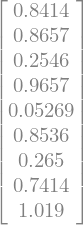

In [428]:
A = Matrix(matArr[j-1])
N_vec = Matrix(C/t)
#Diagonalwerte der Gewichtungsmatrix
Nj = C/t
Nj_err = C_err/t

#Korrektur zum letzten Versuch
Nj_uarr = unp.log(unp.uarray(I_0_12[j-1],I_0_12_err[j-1])/unp.uarray(Nj, Nj_err))
Nj = unp.nominal_values(Nj_uarr)
Nj_err = unp.std_devs(Nj_uarr)

w_i  =  [np.sqrt((I_0_err[I0_index[k]]/I_0[I0_index[k]])**2 + (Nj_err[i]/Nj[i])**2) for i,k in enumerate(j)]
W = Matrix(np.diag(w_i))

mu = (A.transpose()*W*A).inv()*(A.transpose()*W*N_vec)
(abs(mu)/10).evalf(4) #Konvertiere von 1/m zu 1/cm


In [406]:
df = pd.DataFrame(data=np.array((abs(mu)/10).evalf(4)).astype(np.float64))
print(df.to_latex(index=False))

\begin{tabular}{r}
\toprule
       0 \\
\midrule
0.841423 \\
0.865685 \\
0.254574 \\
0.965683 \\
0.052687 \\
0.853554 \\
0.265022 \\
0.741425 \\
1.019241 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/3181882443.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [429]:
muArr = np.array(abs(mu)/10).astype(np.float64)
mean = np.mean(muArr)
mean_err = np.std(muArr)/np.sqrt(len(muArr))
mean_full = ufloat(mean,mean_err)
print(mean_full)


theo = {
    0.2007:"Aluminium",
    1.1741:"Blei",
    0.5705:"Eisen",
    0.5917:"Messing",
    0.1167:"Delrin"
}
theo_inv = {theo[value]:value for value in theo}

naechsterWert = list(theo)[np.argmin([np.abs(mean-value) for value in theo])]
print(theo[naechsterWert]+": "+ str(np.around((mean/naechsterWert-1)*100,2))+"%")
naechsterWert = theo_inv["Messing"]
print(theo[naechsterWert]+": "+ str(np.around((mean/naechsterWert-1)*100,2))+"%")

0.65+/-0.11
Messing: 10.03%
Messing: 10.03%


# Block 4

In [377]:
filepath = []
peakValue = []
peakIndex = []
for root, dirs, files in os.walk("Daten/Block 3/"):
    for filename in files:
        #print(os.path.join(root,filename))
        filepath.append(os.path.join(root,filename))
        data = np.genfromtxt(os.path.join(root,filename), skip_header=12, skip_footer=14)
        peaks, _ = find_peaks(data,prominence=50)
        peaks = peaks[1] 
        # plt.plot(peaks,data[peaks],"x")
        # plt.plot(data)
        # plt.show()
        peakIndex.append(peaks)
        peakValue.append(data[peaks])

data = pd.DataFrame([])
peakValue=np.array(peakValue)
data["Zeit"] = 300*np.ones(len(filepath))
data["C"] = peakValue

data["I"] = data["C"]/data["Zeit"]
reihenfolge = ["C","Zeit" , "I"]
data = data.reindex(columns = reihenfolge)
neuData = data.astype({"Zeit":int, "C":int}).round({"I":2})

print(neuData.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    C &  Zeit &     I \\
\midrule
0 &  327 &   300 &  1.09 \\
1 &  361 &   300 &  1.20 \\
2 &  155 &   300 &  0.52 \\
3 &  152 &   300 &  0.51 \\
4 &  362 &   300 &  1.21 \\
5 &  345 &   300 &  1.15 \\
6 &  352 &   300 &  1.17 \\
7 &  328 &   300 &  1.09 \\
8 &  493 &   300 &  1.64 \\
9 &  403 &   300 &  1.34 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/1894960086.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(neuData.to_latex())


In [407]:
C =  np.array([14752,13959,13095,9203,8382,11430,41959,1732,40324,9735,8366,13498])
C_err = np.array([146,170,168,140,107,194,274,52,279,161,104,170])
uarrC = unp.uarray(C,C_err)
j = np.array([inv_pathDict[k] for k in [123,456,789,26,159,48,147,258,369,24,357,68]])
t = np.array([300 for i in range(C.size)])

df = pd.DataFrame(columns=["Projektion", "Zeit","C","C_err","I"])
df["Projektion"] = j 
df["Zeit"] = t 
df["C"] = C
df["C_err"] = C_err
df["I"] = uarrC/t 

print(df.to_latex(index=False))

\begin{tabular}{rrrrl}
\toprule
 Projektion &  Zeit &     C &  C\_err &            I \\
\midrule
          4 &   300 & 14752 &    146 &   49.2+/-0.5 \\
          5 &   300 & 13959 &    170 &   46.5+/-0.6 \\
          6 &   300 & 13095 &    168 &   43.6+/-0.6 \\
          7 &   300 &  9203 &    140 &   30.7+/-0.5 \\
          8 &   300 &  8382 &    107 &   27.9+/-0.4 \\
          9 &   300 & 11430 &    194 &   38.1+/-0.6 \\
         12 &   300 & 41959 &    274 &  139.9+/-0.9 \\
         11 &   300 &  1732 &     52 &  5.77+/-0.17 \\
         10 &   300 & 40324 &    279 &  134.4+/-0.9 \\
          1 &   300 &  9735 &    161 &   32.5+/-0.5 \\
          2 &   300 &  8366 &    104 & 27.89+/-0.35 \\
          3 &   300 & 13498 &    170 &   45.0+/-0.6 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/2116558524.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


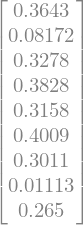

In [418]:
A = Matrix(matArr[j-1])
N_vec = Matrix(C/t)
#Diagonalwerte der Gewichtungsmatrix
Nj = C/t
Nj_err = C_err/t

# Korrektur zum letzten Versuch
# Nj_uarr = unp.log(unp.uarray(I_0_12[j-1],I_0_12_err[j-1])/unp.uarray(Nj, Nj_err))
# Nj = unp.nominal_values(Nj_uarr)
# Nj_err = unp.std_devs(Nj_uarr)
# N_vec = Matrix(Nj)

w_i  =  [np.sqrt((I_0_err[I0_index[k]]/I_0[I0_index[k]])**2 + (Nj_err[i]/Nj[i])**2) for i,k in enumerate(j)]
W = Matrix(np.diag(w_i))

# mu = (A.transpose()*W*A).inv()*(A.transpose()*W*N_vec)
# (mu/100).evalf(4) #Konvertiere von 1/m zu 1/cm

mu = (A.transpose()*A).inv()*A.transpose()*N_vec
(abs(mu)/100).evalf(4) #Konvertiere von 1/m zu 1/cm


In [419]:
df = pd.DataFrame(data=np.array((abs(mu)/100).evalf(4)).astype(np.float64))
print(df.to_latex(index=False))

\begin{tabular}{r}
\toprule
       0 \\
\midrule
0.364250 \\
0.081718 \\
0.327763 \\
0.382805 \\
0.315788 \\
0.400906 \\
0.301147 \\
0.011126 \\
0.265038 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/1737483325.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [387]:
theo = {
    0.2007:"Aluminium",
    1.1741:"Blei",
    0.5705:"Eisen",
    0.5917:"Messing",
    0.1167:"Delrin"
}
theo_inv = {theo[value]:value for value in theo}

In [423]:
#Mittelwert von
#mu5, mu7, mu9

muArr = np.array(abs(mu)/100).astype(np.float64)
# mean = np.mean(muArr) 
# mean_err = np.std(muArr)/np.sqrt(len(muArr))
# mean_full = ufloat(mean,mean_err)
# print(mean_full)

elemente = []
abweichungen = []
for mu_i in muArr:
    naechsterWert = list(theo)[np.argmin([np.abs(mu_i-value) for value in theo])]
    print(theo[naechsterWert]+": "+ str(np.around((mean/naechsterWert-1)*100,2))+"\%")

# naechsterWert = list(theo)[np.argmin([np.abs(muArr-value) for value in theo])]
# print(theo[naechsterWert]+": "+ str(np.around((mean/naechsterWert-1)*100,2))+"%")
# naechsterWert = theo_inv["Delrin"]
# print(theo[naechsterWert]+": "+ str(np.around((mean/naechsterWert-1)*100,2))+"%")

Aluminium: 35.67\%
Delrin: 133.32\%
Aluminium: 35.67\%
Aluminium: 35.67\%
Aluminium: 35.67\%
Eisen: -52.27\%
Aluminium: 35.67\%
Delrin: 133.32\%
Aluminium: 35.67\%


In [422]:
muArr

array([[0.36425049],
       [0.08171835],
       [0.32776096],
       [0.38280487],
       [0.3157866 ],
       [0.40090681],
       [0.30114884],
       [0.01112553],
       [0.26503644]])

\begin{tabular}{r}
\toprule
        0 \\
\midrule
 0.319382 \\
-0.011704 \\
 0.286453 \\
 0.299416 \\
-0.207928 \\
 0.329380 \\
 0.246958 \\
 0.061736 \\
 0.211761 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2643/2034900186.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [424]:
A = Matrix([
    [0, sqrt(2), 0, sqrt(2),0,0,0,0,0], 
    [0,0,sqrt(2), 0, sqrt(2), 0, sqrt(2), 0,0], 
    [0, 0,0,0,0,sqrt(2),0,sqrt(2),0],
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [0,sqrt(2),0,0,0,sqrt(2),0,0,0],
    [sqrt(2),0,0,0,sqrt(2),0,0,0,sqrt(2)],
    [0,0,0,sqrt(2),0,0,0,sqrt(2),0],
    [0,0,1,0,0,1,0,0,1],
    [0,1,0,0,1,0,0,1,0],
    [1,0,0,1,0,0,1,0,0]])

A_symbol = symbols("A")
print(latex(Eq(S(A_symbol),A,evaluate=False)))

A = \left[\begin{matrix}0 & \sqrt{2} & 0 & \sqrt{2} & 0 & 0 & 0 & 0 & 0\\0 & 0 & \sqrt{2} & 0 & \sqrt{2} & 0 & \sqrt{2} & 0 & 0\\0 & 0 & 0 & 0 & 0 & \sqrt{2} & 0 & \sqrt{2} & 0\\1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1\\0 & \sqrt{2} & 0 & 0 & 0 & \sqrt{2} & 0 & 0 & 0\\\sqrt{2} & 0 & 0 & 0 & \sqrt{2} & 0 & 0 & 0 & \sqrt{2}\\0 & 0 & 0 & \sqrt{2} & 0 & 0 & 0 & \sqrt{2} & 0\\0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1\\0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0\\1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0\end{matrix}\right]


NonSquareMatrixError: 